# Pymaceuticals Inc.
---

### Analysis

### Three observations
- The distribution of female and male mice in this study are almost equal.
- Mice treated with either Capomulin or Ramicane regimen have smaller final tumor volume, compared to those treated with either Infubinol or Ceftamin regimen.
- For the Capomulin regimen treated group, mouse weight and the average tumor volume are positively correlated.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Read the mouse data to analysis
print(mouse_metadata.head(10))
print(f'-------------------------------------------------------------')
#Read the study results to analysis
print(study_results.head(10))


  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
5     s508     Ramicane    Male           1          17
6     f966    Capomulin    Male          16          17
7     m546     Ramicane    Male          18          16
8     z578     Ramicane    Male          11          16
9     j913     Ramicane  Female           4          17
-------------------------------------------------------------
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0 

In [3]:
# Combine the data into a single DataFrame
combined_data=pd.merge(study_results, mouse_metadata, on='Mouse ID',how='left')
# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
mouse_metadata['Mouse ID'].count()
# We are using the mouse data to count the mice

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID=combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID
#We are looking for duplicates using the Mouse ID column and Timepoint column, in the results bellow we get the Mouse ID where have duplicates

array(['g989'], dtype=object)

In [6]:
#We are will list the duplicates values now
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_data=combined_data.loc[combined_data['Mouse ID']=="g989",:]
dup_mice_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=combined_data[combined_data['Mouse ID']!='g989']
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.

clean_data['Mouse ID'].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
combined_clean=combined_data[combined_data["Mouse ID"] != 'g989']

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
Summary_Grp=combined_clean.groupby(["Drug Regimen"])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Summary=Summary_Grp["Tumor Volume (mm3)"].mean()
Summary=pd.merge(Summary,Summary_Grp["Tumor Volume (mm3)"].median().reset_index(name="Median Tumor Volume"),on="Drug Regimen",how="left")
Summary=pd.merge(Summary,Summary_Grp["Tumor Volume (mm3)"].var().reset_index(name="Tumor Volume Variance"),on="Drug Regimen",how="left")
Summary=pd.merge(Summary,Summary_Grp["Tumor Volume (mm3)"].std().reset_index(name="Tumor Volume Std. Deviation"),on="Drug Regimen",how="left")
Summary=pd.merge(Summary,Summary_Grp["Tumor Volume (mm3)"].sem().reset_index(name="Tumor Volume SEM"),on="Drug Regimen",how="left")


Summary

,Drug Regimen,Tumor Volume (mm3),Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Deviation,Tumor Volume SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
Summary2=combined_clean[["Drug Regimen","Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).agg(['mean','median','var','std','sem'])
# Using the aggregation method, produce the same summary statistics in a single line
Summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [11]:
#First creat a group series using the 'Drug Regimen' colummn and count the number of data points for each Drug Regimen
mice_count=clean_data["Drug Regimen"].value_counts()
mice_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Number of Mice per Treatment')

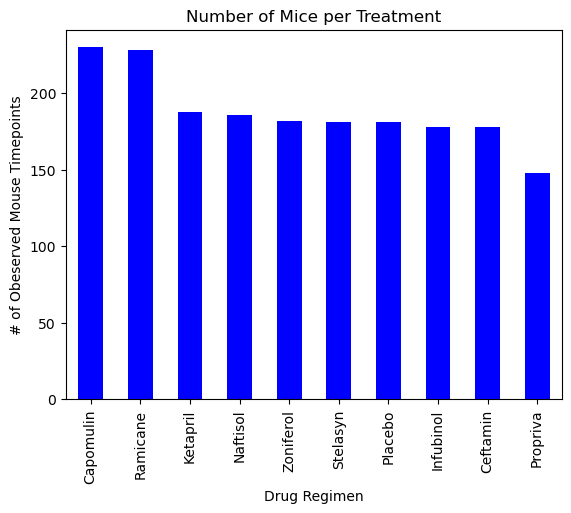

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
plot_pandas=mice_count.plot.bar(color='b')
#Set the labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Obeserved Mouse Timepoints")
plt.title("Number of Mice per Treatment")

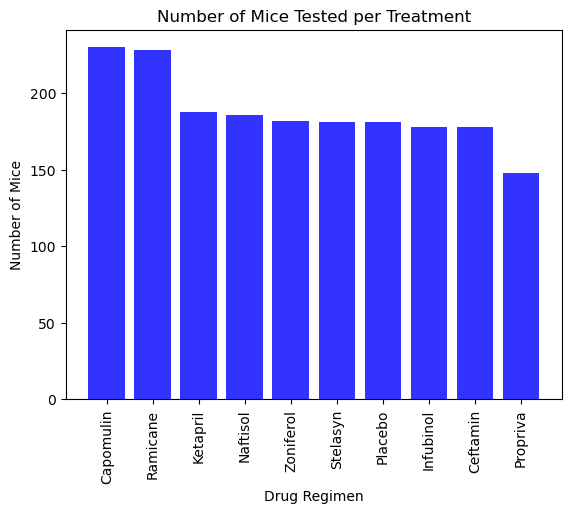

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis=mice_count.index.values
y_axis=mice_count.values

#Create a Pyplot bar based of the group series 
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

#Set the labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")
plt.title("Number of Mice Tested per Treatment")
plt.show()

Male      958
Female    922
Name: Sex, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

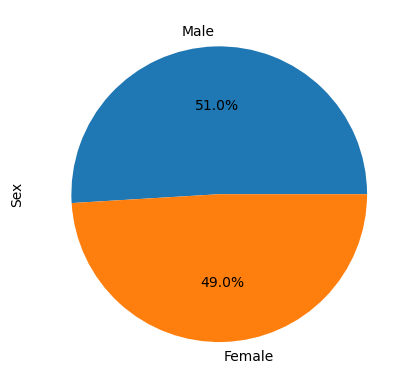

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#First need to sort the sex column
gender_data=clean_data["Sex"].value_counts()
print(gender_data)

gender_data.plot.pie(autopct="%1.1f%%")
plt.show

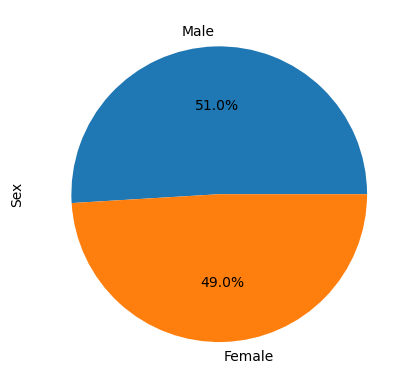

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=['Female', 'Male']
sizes=[49, 50]
plot=gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

- Not using loops

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse
#Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [17]:
# Create empty list to fill with tumor vol data (for plotting)
#Calculation
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]
quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lower_q=quartiles[0.25]
upper_q=quartiles[0.75]
iq_range=upper_q-lower_q
print(f"--------------------------------------------------------------")
print(f"Lower quartile of Capomulin tumors  -->{lower_q}")
print(f"Upper quartile of Capomulin tumors  -->{upper_q}")
print(f"Interquartile range of Capomulin tumors  -->{iq_range}")
print(f"Median of Capomulin tumors  -->{quartiles[0.5]}")

# Determine outliers using upper and lower bounds
lower_bound=lower_q-(1.5*iq_range)
upper_bound=upper_q+(1.5*iq_range)

print(f"Outlier lower  -->{lower_bound}")
print(f"Outlier higher  -->{upper_bound}")
print(f"-------------------------------------------------------------")


--------------------------------------------------------------
Lower quartile of Capomulin tumors  -->32.37735684
Upper quartile of Capomulin tumors  -->40.1592203
Interquartile range of Capomulin tumors  -->7.781863460000004
Median of Capomulin tumors  -->38.1251644
Outlier lower  -->20.70456164999999
Outlier higher  -->51.83201549
-------------------------------------------------------------


In [18]:
# Create empty list to fill with tumor vol data (for plotting)
#Ramicane
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
#print(Ramicane_merge.head())
Ramicane_merge.to_csv("output.csv")
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]
Ramicane_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [19]:
#Calculation
quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iq_range = upper_q-lower_q

print(f"--------------------------------------------------------------")
print(f"Lower quartile of Ramicane tumors  -->{lower_q}")
print(f"Upper quartile of Ramicane tumors  -->{upper_q}")
print(f"Interquartile range of Ramicane tumors  -->{iq_range}")
print(f"Median of Ramicane tumors  -->{quartiles[0.5]}")

# Determine outliers using upper and lower bounds
lower_bound = lower_q - (1.5*iq_range)
upper_bound = upper_q + (1.5*iq_range)

print(f"Outlier lower  -->{lower_bound}")
print(f"Outlier higher  -->{upper_bound}")
print(f"-------------------------------------------------------------")


--------------------------------------------------------------
Lower quartile of Ramicane tumors  -->31.56046955
Upper quartile of Ramicane tumors  -->40.65900627
Interquartile range of Ramicane tumors  -->9.098536719999998
Median of Ramicane tumors  -->36.56165229
Outlier lower  -->17.912664470000003
Outlier higher  -->54.30681135
-------------------------------------------------------------


In [20]:
# Create empty list to fill with tumor vol data (for plotting)
#Infubinol
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [21]:
#Calculation
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iq_range = upper_q-lower_q

print(f"--------------------------------------------------------------")
print(f"Lower quartile of Infubinol tumors  -->{lower_q}")
print(f"Upper quartile of Infubinol tumors  -->{upper_q}")
print(f"Interquartile range of Infubinol tumors  -->{iq_range}")
print(f"Median of Infubinol tumors  -->{quartiles[0.5]}")

# Determine outliers using upper and lower bounds
lower_bound = lower_q - (1.5*iq_range)
upper_bound = upper_q + (1.5*iq_range)

print(f"Outlier lower  -->{lower_bound}")
print(f"Outlier higher  -->{upper_bound}")
print(f"-------------------------------------------------------------")



--------------------------------------------------------------
Lower quartile of Infubinol tumors  -->54.04860769
Upper quartile of Infubinol tumors  -->65.52574285
Interquartile range of Infubinol tumors  -->11.477135160000003
Median of Infubinol tumors  -->60.16518046
Outlier lower  -->36.83290494999999
Outlier higher  -->82.74144559000001
-------------------------------------------------------------


In [22]:
# Create empty list to fill with tumor vol data (for plotting)
#Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [23]:
#Calculation
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iq_range = upper_q-lower_q

print(f"--------------------------------------------------------------")
print(f"Lower quartile of Ceftamin tumors  -->{lower_q}")
print(f"Upper quartile of Ceftamin tumors  -->{upper_q}")
print(f"Interquartile range of Ceftamin tumors  -->{iq_range}")
print(f"Median of Ceftamin tumors  -->{quartiles[0.5]}")

# Determine outliers using upper and lower bounds
lower_bound = lower_q - (1.5*iq_range)
upper_bound = upper_q + (1.5*iq_range)

print(f"Outlier lower  -->{lower_bound}")
print(f"Outlier higher  -->{upper_bound}")
print(f"-------------------------------------------------------------")


--------------------------------------------------------------
Lower quartile of Ceftamin tumors  -->48.72207785
Upper quartile of Ceftamin tumors  -->64.29983003
Interquartile range of Ceftamin tumors  -->15.577752179999997
Median of Ceftamin tumors  -->59.85195552
Outlier lower  -->25.355449580000002
Outlier higher  -->87.66645829999999
-------------------------------------------------------------


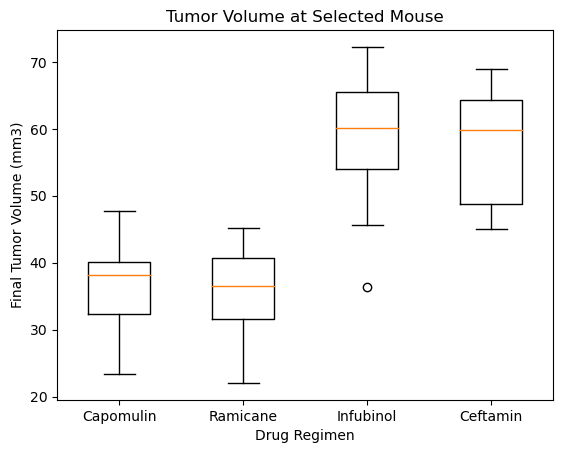

In [32]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

#Labels
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')

ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.5, vert=True)
ax1.set_title('Tumor Volume at Selected Mouse')
plt.show()


## Calculating Quartiles, Outliers and Boxplots using for loop

- Create empty list to fill with tumor vol data (for plotting)
- Calculate the IQR and quantitatively determine if there are any potential outliers.
- Locate the rows which contain mice on each drug and get the tumor volumes add subset
- Determine outliers using upper and lower bounds

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = combined_data[combined_data["Drug Regimen"].isin(drug_list)]
drugs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
29,c326,0,45.0,0,Infubinol,Female,18,25
30,c139,0,45.0,0,Infubinol,Male,11,28
31,v339,0,45.0,0,Infubinol,Male,20,26
32,a577,0,45.0,0,Infubinol,Female,6,25


In [26]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#Reshape dataframe
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drug_list:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [27]:
# Put treatments into a list for for loop  
# Create empty list to fill with tumor vol data
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes add subset 
# Determine outliers using upper and lower bounds
treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lower_q = quartiles[0.25].round(2)
    upper_q = quartiles[0.75].round(2)
    iq_range = round(upper_q-lower_q,2)
    lower_bound = round(lower_q - (1.5*iq_range),2)
    upper_bound = round(upper_q + (1.5*iq_range),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} --> {lower_q}")
    print(f"The upper quartile of {drug} --> {upper_q}")
    print(f"The interquartile range of {drug} --> {iq_range}")
    print(f"Outlier lower {lower_bound} for {drug}.")
    print(f"Outlier higher {upper_bound} for {drug}.")
    print(f"-----------------------------------------------------------------")
    treatment+=1

------------------------------------------------------------
The lower quartile of Capomulin --> 32.38
The upper quartile of Capomulin --> 40.16
The interquartile range of Capomulin --> 7.78
Outlier lower 20.71 for Capomulin.
Outlier higher 51.83 for Capomulin.
-----------------------------------------------------------------
The lower quartile of Ramicane --> 31.56
The upper quartile of Ramicane --> 40.66
The interquartile range of Ramicane --> 9.1
Outlier lower 17.91 for Ramicane.
Outlier higher 54.31 for Ramicane.
-----------------------------------------------------------------
The lower quartile of Infubinol --> 54.05
The upper quartile of Infubinol --> 65.53
The interquartile range of Infubinol --> 11.48
Outlier lower 36.83 for Infubinol.
Outlier higher 82.75 for Infubinol.
-----------------------------------------------------------------
The lower quartile of Ceftamin --> 48.72
The upper quartile of Ceftamin --> 64.3
The interquartile range of Ceftamin --> 15.58
Outlier lower 25

## Line ans Scatter Plots



Text(0.5, 1.0, 'Capomulin treatmeant of mouse l509')

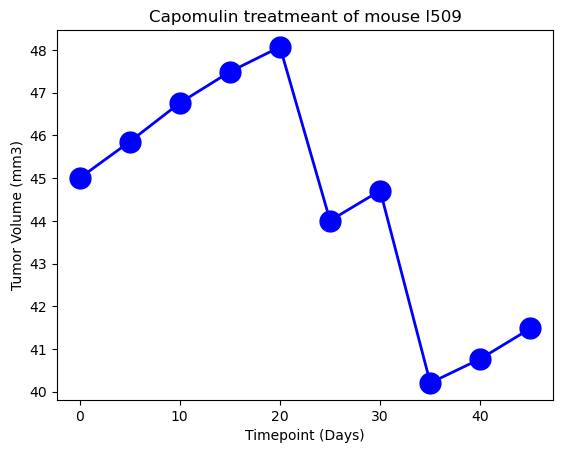

In [33]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatmeant of mouse l509')

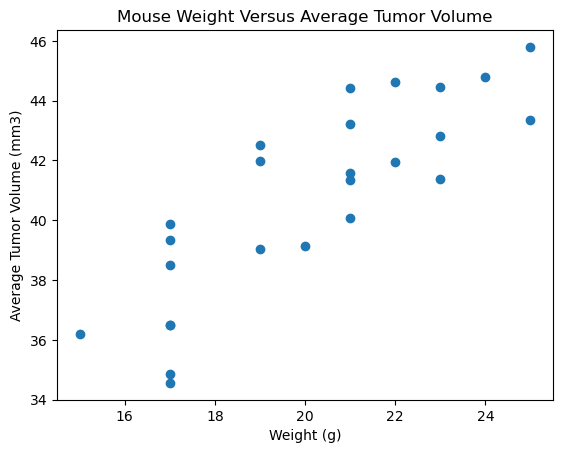

In [34]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = combined_data.loc[combined_data["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
avg_tumor_capomulin = capomulin_df["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_df["Weight (g)"].unique()
plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


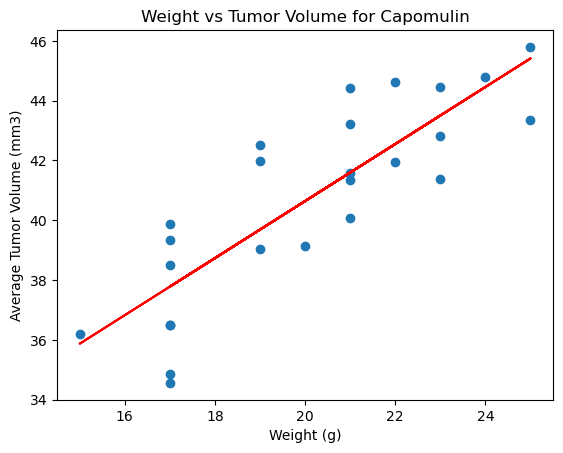

In [35]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight = mouse_weight.astype(float)
correlation = st.pearsonr(mouse_weight, avg_tumor_capomulin)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_capomulin)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.plot(mouse_weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()